In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('SalaryData.csv')

In [3]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
y = dataset['Salary']
X = dataset['YearsExperience']

In [5]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [7]:
X.shape

(30,)

In [8]:
type(X)

pandas.core.series.Series

In [9]:
X=X.values#converting into numpy array

In [10]:
X=X.reshape(-1,1)#reshaping the X 

In [11]:
X.shape

(30, 1)

In [12]:
y.shape

(30,)

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
model = LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.predict([[6.8]])

array([90051.94398456])

In [17]:
model.predict([[0]])

array([25792.20019867])

In [18]:
c = model.coef_

In [19]:
c

array([9449.96232146])

In [20]:
c*1.1

array([10394.9585536])

In [21]:
yhat = model.predict(X)

In [22]:
yhat

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [23]:
b = model.intercept_


In [24]:
b

25792.20019866871

In [25]:
b + c*1.1


array([36187.15875227])

In [26]:
import joblib

In [29]:
joblib.dump(model , 'salary1.pk1')

['salary1.pk1']

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y,yhat) #for errors removal we take mean

4644.2012894435375

In [35]:
from sklearn.model_selection import train_test_split #test and train data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ]])

In [41]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [48]:
y_pred=model.predict(X_test)

In [49]:
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [58]:
df=pd.DataFrame({'Actual' :y_test, 'predicted':y_pred})

In [59]:
df

,Actual,predicted
27,112635.0,115573.622884
15,67938.0,71679.938782
23,113812.0,102498.908470
17,83088.0,75415.571471
8,64445.0,55803.499851
9,57189.0,60473.040713
28,122391.0,122110.980090
24,109431.0,107168.449332
12,56957.0,63274.765230


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

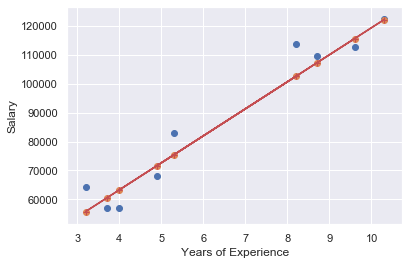

In [71]:
plt.scatter(X_test,y_test)#in blue
plt.scatter(X_test,y_pred)#in orange 
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X_test,y_pred,color = 'r',marker= '+',ls='-')#best fit line